# Assess the differences with MAGMA windows on gene lists and scDRS results
1. Gene-list differences
2. Cell-level results

## 0. Set Up

In [ ]:
meta_colors_mac <- c("M-0: MERTK+ SELENOP+ LYVE1+"="#d0b4dc",
                 "M-1: MERTK+ SELENOP+ LYVE1-"="#FCCDE5", 
                 "M-2: MERTK+ S100A8+"="#945cb4", 
                 "M-3: MERTK+ HBEGF+"="#842bd7", 
                 "M-4: SPP1+"="yellow4", 
                 "M-5: C1QA+"="#B38072",
                 "M-6: STAT1+ CXCL10+"="#d11141", 
                 "M-7: IL1B+ FCN1+ HBEGF+"="#FDB462", 
                 "M-8: PLCG2+"="grey", 
                 "M-9: DC3"="#1F78B4", 
                 "M-10: DC2"="#A6CEE3", 
                 "M-11: CD16+/DC4"="#66C2A4", 
                 "M-12: DC1"="#CCECE6",
                 "M-13: pDC"="#238B45", 
                 "M-14: LAMP3+"="#A1D99B")
meta_colors_mac <- c("M-0: MERTK+ SELENOP+ LYVE1+"="#d0b4dc",
                 "M-1: MERTK+ SELENOP+ LYVE1-"="#FCCDE5", 
                 "M-2: MERTK+ S100A8+"="#945cb4", 
                 "M-3: MERTK+ HBEGF+"="#842bd7", 
                 "M-4: SPP1+"="yellow4", 
                 "M-5: C1QA+"="#B38072",
                 "M-6: STAT1+ CXCL10+"="#d11141", 
                 "M-7: IL1B+ FCN1+ HBEGF+"="#FDB462", 
                 "M-8: PLCG2+"="grey", 
                 "M-9: DC3"="#1F78B4", 
                 "M-10: DC2"="#A6CEE3", 
                 "M-11: CD16+/DC4"="#66C2A4", 
                 "M-12: DC1"="#CCECE6",
                 "M-13: pDC"="#238B45", 
                 "M-14: LAMP3+"="#A1D99B")
meta_colors_fib <- c('F-0: PRG4+ CLIC5+ lining'='#A6CEE3',
                   'F-1: PRG4+ lining'='#1F78B4', 
                   'F-2: CD34+ sublining'='#B2DF8A', 
                   'F-3: POSTN+ sublining'='#33A02C', 
                   'F-4: DKK3+ sublining'='#E31A1C', 
                   'F-5: CD74-hi sublining'='#FB9A99', 
                   'F-6: CXCL12+ SFRP1+ sublining'='#FDBF6F', 
                   'F-7: NOTCH3+ sublining'='#FF7F00', 
                   'F-8: RSPO3+ intermediate'='#6495ED', 
                   'Mu-0: Mural'='#9932CC')
meta_colors_b <- c("B-0: CD24+CD27+CD11b+\n switched memory" = "#A6CEE3", 
                   "B-1: CD24++CD27+IgM+\n unswitched memory" = "#B2DF8A", 
                   "B-2: IgM+IgD+TCL1A+ naive" = "#FF7F00", 
                   "B-3: IgM+IgD+CD1c+ MZ-like" = "#1F78B4",
                   "B-4: AICDA+BCL6+ GC-like" = "#33A02C",
                   "B-5: CD11c+LAMP1+ ABC" = "#CAB2D6",
                   "B-6: IgM+ plasma" = "#FDBF6F", 
                   "B-7: HLA-DR+IgG+ plasmablast" = "brown",
                   "B-8: IgG1+IgG3+ plasma" = "#6A3D9A"
                   )

meta_colors_t <- c("T-0: CD4+ IL7R+ memory" = "#A6CEE3", "T-1: CD4+ CD161+ memory" = "#1F78B4", 
                 "T-2: CD4+ IL7R+CCR5+ memory" = "#B2DF8A", "T-3: CD4+ Tfh/Tph" = "#33A02C", 
                 "T-4: CD4+ naive" = "#FB9A99", "T-5: CD4+ GZMK+ memory" = "#E31A1C", 
                 "T-6: CD4+ memory" = "#FDBF6F", "T-7: CD4+ Tph" = "#FF7F00", 
                 "T-8: CD4+ CD25-high Treg" = "#CAB2D6", "T-9: CD4+ CD25-low Treg" = "#6A3D9A", 
                 "T-10: CD4+ OX40+NR3C1+" = "#FFFF99", "T-11: CD4+ CD146+ memory" = "#B15928", 
                 "T-12: CD4+ GNLY+" = "#B3E2CD", "T-13: CD8+ GZMK/B+ memory" = "#FDCDAC", 
                 "T-14: CD8+ GZMK+ memory" = "#CBD5E8", "T-15: CD8+ GZMB+/TEMRA" = "#F4CAE4",
                 "T-16: CD8+ CD45ROlow/naive" = "#1B9E77", "T-17: CD8+ activated/NK-like" = "#D95F02",
                 "T-18: Proliferating" = "#7570B3", "T-19: MT-high (low quality)" = "#E7298A", 
                 "T-20: CD38+" = "#66A61E", "T-21: Innate-like" = "#E6AB02", 
                 "T-22: Vdelta1" = "#A6761D", "T-23: Vdelta2" = "#666666")

meta_colors_nk <- c("NK-0: CD56dim CD16+ IFNG-" = "#9E0142", 
                    "NK-1: CD56dim CD16+ IFNG+CD160+" = "#D53E4F", 
                    "NK-2: CD56dim CD16+ IFNG+CD160-" = "#F46D43",
                    "NK-3: CD56dim CD16+ GZMB-" = "#FDAE61", 
                    "NK-4: CD56bright CD16- GZMA+CD160+" = "#FEE08B", 
                    "NK-5: CD56bright CD16- GZMA+CD69+" = "#FFFFBF", 
                    "NK-6: CD56bright CD16- GNLY+" = "#E6F598", 
                    "NK-7: CD56bright CD16- GNLY+CD69+" = "#ABDDA4", 
                    "NK-8: CD56bright CD16- IFN response" = "#66C2A5",
                    "NK-9: MT-high" = "#3288BD", 
                    "NK-10: PCNA+ Proliferating" = "grey",
                    "NK-11: MKI67+ Proliferating" = "dimgrey", 
                    "NK-12: IL7R+ ILC" = "#BEAED4", 
                    "NK-13: IL7R+CD161+ ILC" = "#5E4FA2")

meta_colors_end <- c("E-0: SPARC+ capillary" = "#8DD3C7", 
                     "E-1: LIFR+ venular" = "#BEBADA",
                     "E-2: ICAM1+ venular" = "#FB8072", 
                     "E-3: NOTCH4+ arteriolar" = "#80B1D3", 
                     "E-4: Lymphatic" = "#FDB462")
meta_colors <- c(meta_colors_b, meta_colors_end, meta_colors_fib, meta_colors_mac, meta_colors_t, meta_colors_nk)

meta_colors <- c(meta_colors_t, meta_colors_nk, 
                 meta_colors_mac, meta_colors_b,
                meta_colors_fib, meta_colors_end)

In [ ]:
meta_colors1 <- list(meta_colors_t, meta_colors_nk, 
                 meta_colors_mac, meta_colors_b,
                meta_colors_fib, meta_colors_end)
meta_colors1 <- list(meta_colors_end, meta_colors_fib, 
                     meta_colors_b, meta_colors_mac,
                     meta_colors_nk, meta_colors_t)

In [42]:
library(data.table)
library(tidyverse)
#library("EnsDb.Hsapiens.v86")
#library(reshape2)
library(R.utils)
library(UpSetR)
library(grid)
library(cowplot)

## 1. Read in Data

In [49]:
dir <- "/Users/hopekirby/Desktop/SCRNA-GWAS-Benchmarking/output/MAGMA/RA/"
# read in the list of genes for the different MAGMA levels
genes_out_0 = fread(paste0(dir,"RA_0kb_Pval_onlyinrna_nodups_07-09-23.tsv"))
genes_out_5 = fread(paste0(dir,"RA_5kb_Pval_onlyinrna_nodups_07-09-23.tsv"))
genes_out_10 = fread(paste0(dir,"RA_10kb_Pval_onlyinrna_nodups_07-09-23.tsv"))
genes_out_53 = fread(paste0(dir,"RA_5035_Pval_2023_06_13.tsv"))
genes_out_100 = fread(paste0(dir,"RA_100kb_Pval_onlyinrna_nodups_07-09-23.tsv"))

In [47]:
genes_out_0[1:2,]

GENE,CHR,START,STOP,NSNPS,NPARAM,N,ZSTAT,P
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>
MAGI3,1,113933087,114228545,750,44,97173,8.3825,2.5907e-17
HIPK1,1,114471819,114520491,97,25,97173,7.8516,2.0539e-15


In [5]:
# rank the dataframes from lowest to highest p value 
genes_out_0 <- genes_out_0[order(genes_out_0$RA), ]
genes_out_5 <- genes_out_5[order(genes_out_5$RA), ]
genes_out_10 <- genes_out_10[order(genes_out_10$RA), ]
genes_out_53 <- genes_out_53[order(genes_out_53$RA), ]
genes_out_100 <- genes_out_100[order(genes_out_100$RA), ]

In [6]:
genes_out_10[1:3,]
dim(genes_out_10)
dim(genes_out_53)
dim(genes_out_0)
dim(genes_out_5)
dim(genes_out_100)

GENE,RA
<chr>,<dbl>
COG6,7.0940e-16
ANKRD55,2.7264e-15
SPRED2,6.0120e-15


[1] 17032     2

[1] 18100     2

[1] 16933     2

[1] 17016     2

[1] 17096     2

## 2. Compare Gene Lists

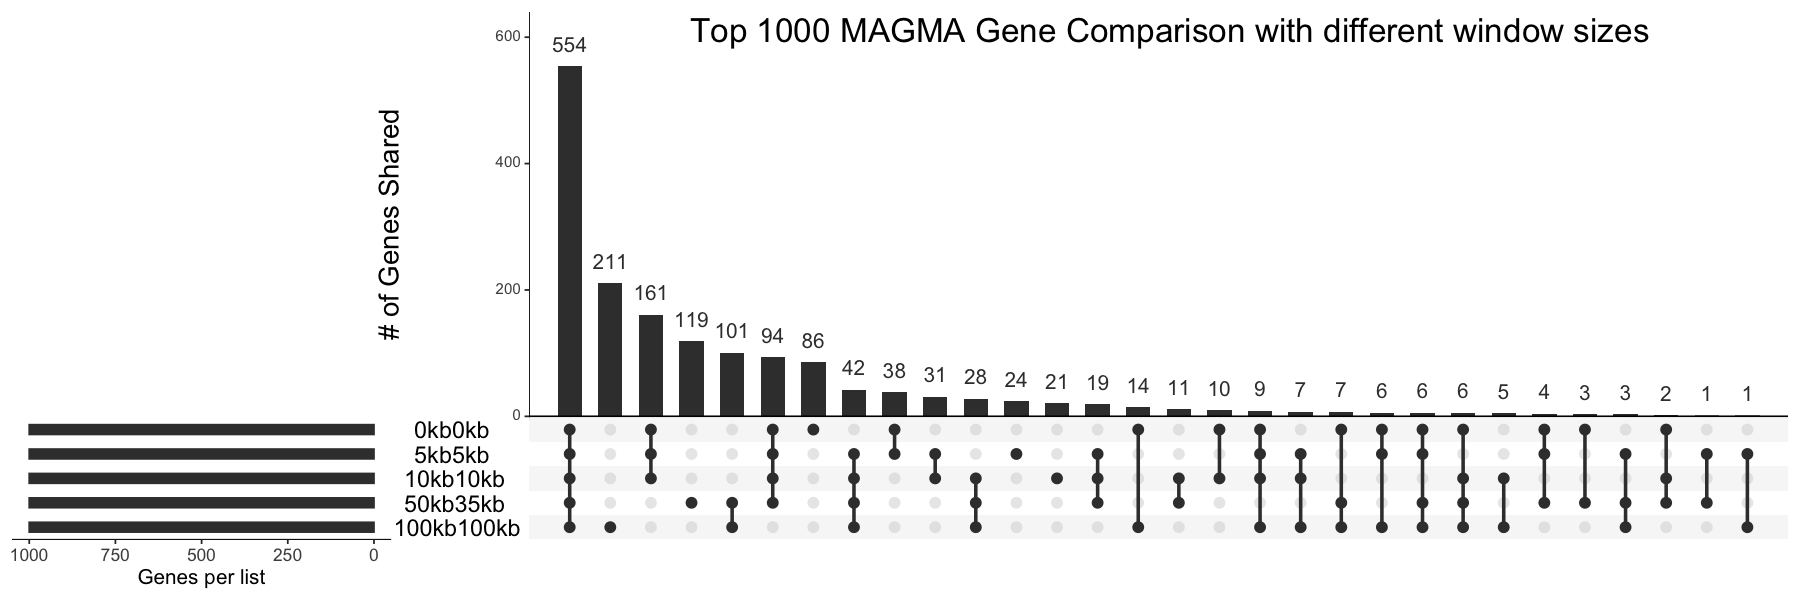

In [10]:
# Just MAGMA window based methods
options(repr.plot.height = 5, repr.plot.width =15 )
ListInput <- list("0kb0kb" = genes_out_0[1:1000,]$GENE, 
                  "5kb5kb" = genes_out_5[1:1000,]$GENE, 
                  "10kb10kb" = genes_out_10[1:1000,]$GENE, 
                  "50kb35kb" = genes_out_53[1:1000,]$GENE, 
                  "100kb100kb" = genes_out_100[1:1000,]$GENE)
upset(fromList(ListInput), sets=c("100kb100kb", "50kb35kb", "10kb10kb", "5kb5kb", "0kb0kb"), order.by = "freq", keep.order=TRUE, sets.x.label= "Genes per list", 
      point.size=3, line.size=1, 
      mainbar.y.label = "# of Genes Shared", text.scale = c(2, 1.3, 1.5, 1.5, 2, 2))
grid.text("Top 1000 MAGMA Gene Comparison with different window sizes",x = 0.65, y=0.95, gp=gpar(fontsize=20))

[1] 554

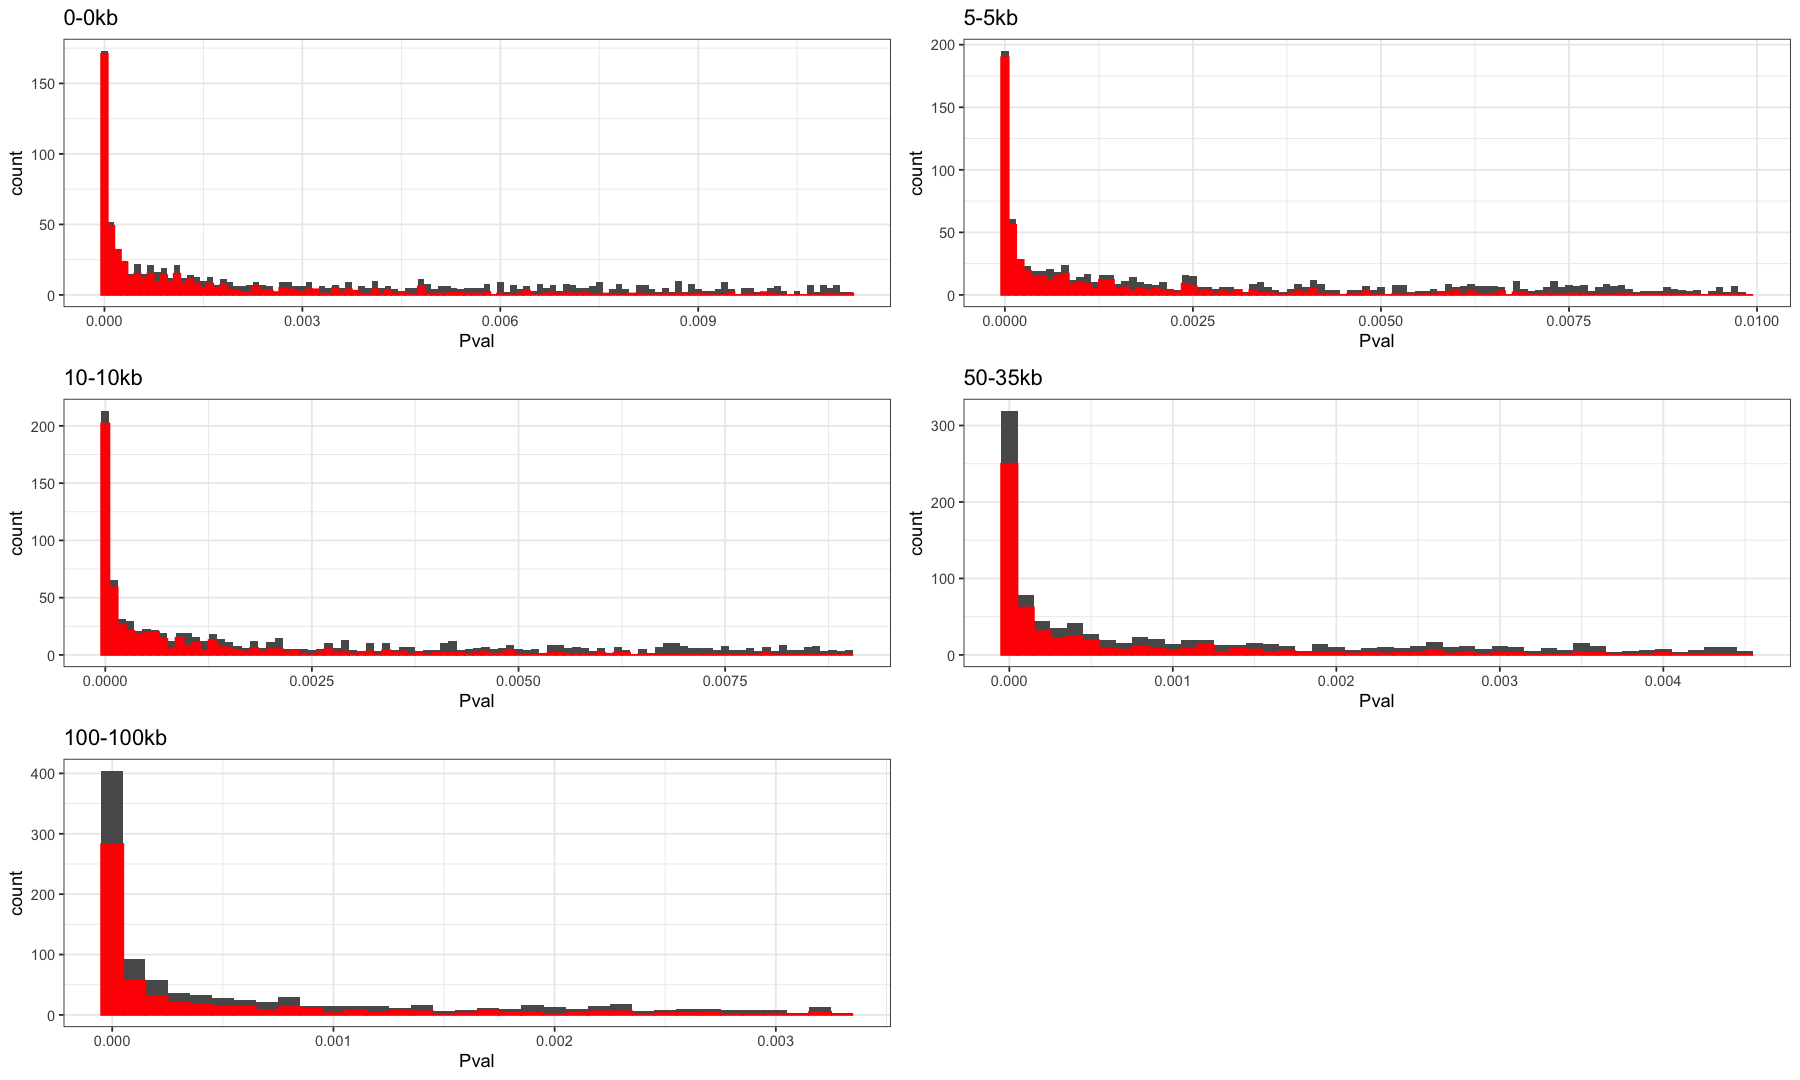

In [56]:
all_shared <- intersect(genes_out_0[1:1000,]$GENE, genes_out_5[1:1000,]$GENE)
all_shared2 <- intersect(genes_out_10[1:1000,]$GENE, genes_out_53[1:1000,]$GENE)
all_shared <- intersect(all_shared, all_shared2)
all_shared <- intersect(all_shared, genes_out_100[1:1000,]$GENE)
length(all_shared)

genes_out_0 = genes_out_0[1:1000,]
genes_out_5 = genes_out_5[1:1000,]
genes_out_10 = genes_out_10[1:1000,]
genes_out_53 = genes_out_53[1:1000,]
genes_out_100 = genes_out_100[1:1000,]
bin=0.0001

options(repr.plot.height = 9, repr.plot.width =15 )
p0 <- ggplot(genes_out_0, aes(x=RA)) + 
geom_histogram(binwidth=bin) + 
geom_histogram(data=genes_out_0[genes_out_0$GENE %in% all_shared,], 
               aes(x=RA), color='red', fill="red", binwidth=bin) + ggtitle("0-0kb") + theme_bw() + labs(x="Pval")
p1 <- ggplot(genes_out_5, aes(x=RA)) + 
geom_histogram(binwidth=bin) + 
geom_histogram(data=genes_out_5[genes_out_5$GENE %in% all_shared,], 
               aes(x=RA), color='red', fill="red", binwidth=bin) + ggtitle("5-5kb") + theme_bw() + labs(x="Pval")
p2 <- ggplot(genes_out_10, aes(x=RA)) + 
geom_histogram(binwidth=bin) + 
geom_histogram(data=genes_out_10[genes_out_10$GENE %in% all_shared,], 
               aes(x=RA), color='red', fill="red", binwidth=bin)+ ggtitle("10-10kb")  + theme_bw() + labs(x="Pval")
p3 <- ggplot(genes_out_53, aes(x=RA)) + 
geom_histogram(binwidth=bin) + 
geom_histogram(data=genes_out_53[genes_out_53$GENE %in% all_shared,], 
               aes(x=RA), color='red', fill="red", binwidth=bin) + ggtitle("50-35kb")+ theme_bw() + labs(x="Pval")

data2 = genes_out_100[genes_out_100$GENE %in% all_shared,]

p4 <- ggplot(genes_out_100, aes(x=RA)) + 
geom_histogram(binwidth=bin) + 
geom_histogram(data=data2, 
               aes(x=RA), color='red', fill="red", binwidth=bin) + ggtitle("100-100kb")+ theme_bw() + labs(x="Pval")

plot_grid(p0,p1,p2,p3,p4, nrow=3)

In [25]:
max(genes_out_100[genes_out_100$GENE %in% all_shared,]$RA)

[1] 0.0031504

## 3. Graph Cluster Results

In [32]:
dir = "~/Desktop/SCRNA-GWAS-Benchmarking/output/scDRS_Win/"
micro_0 = fread(paste0(dir, "RA_0kb.scdrs_group.cell_type"))
micro_5 = fread(paste0(dir, "RA_5kb.scdrs_group.cell_type"))
micro_10 = fread(paste0(dir, "RA_10kb.scdrs_group.cell_type"))
micro_100 = fread(paste0(dir, "RA_100kb.scdrs_group.cell_type"))
output_dir <- "/Users/hopekirby/Desktop/SC_GWAS_Bench/output/SCDRS/RA_53/"
micro_5035 <- fread(paste0(output_dir, "RA.scdrs_group.cell_type_micro"))

In [33]:
# calculate the proportion significant
micro_0$prop_sig <- (micro_0$n_fdr_0.05/micro_0$n_cell)*100
micro_5$prop_sig <- (micro_5$n_fdr_0.05/micro_5$n_cell)*100
micro_10$prop_sig <- (micro_10$n_fdr_0.05/micro_10$n_cell)*100
micro_5035$prop_sig <- (micro_5035$n_fdr_0.05/micro_5035$n_cell)*100
micro_100$prop_sig <- (micro_100$n_fdr_0.05/micro_100$n_cell)*100

In [34]:
micro_0$group2

NULL

In [35]:
# add spaces to the B-cell clusters
add_spaces_dict <- c("B-0: CD24+CD27+CD11b+\n switched memory", 
                    "B-1: CD24++CD27+IgM+\n unswitched memory")
names(add_spaces_dict) <- c("B-0: CD24+CD27+CD11b+ switched memory", "B-1: CD24++CD27+IgM+ unswitched memory")
# micro_0$group2 <- as.character(micro_0$group)
# micro_5$group2 <- as.character(micro_5$group)
# micro_10$group2 <- as.character(micro_10$group)
# micro_5035$group2 <- as.character(micro_5035$group)
# micro_100$group2 <- as.character(micro_100$group)
for (cell_group in names(add_spaces_dict)) {
    micro_0[micro_0$group == cell_group,]$group <- add_spaces_dict[cell_group]
    micro_5[micro_5$group == cell_group,]$group <- add_spaces_dict[cell_group]
    micro_10[micro_10$group == cell_group,]$group <- add_spaces_dict[cell_group]
    micro_5035[micro_5035$group == cell_group,]$group <- add_spaces_dict[cell_group]
    micro_100[micro_100$group == cell_group,]$group <- add_spaces_dict[cell_group]
    }

In [39]:
# get ranked cell clusters according to 5035
ranked_cell_clusters <- c()
for (cell_type in meta_colors1) {
    # get the ranked cells in that group
    data <- micro_5035[micro_5035$group %in% names(cell_type),]
    data <- data[order(abs(assoc_mcz)),]
    # now add the ranked cells to a list
    ranked_cell_clusters <- c(ranked_cell_clusters, data$group)
    } 
ranked_cell_clusters

[1] "E-2: ICAM1+ venular"                     
 [2] "E-0: SPARC+ capillary"                   
 [3] "E-4: Lymphatic"                          
 [4] "E-3: NOTCH4+ arteriolar"                 
 [5] "E-1: LIFR+ venular"                      
 [6] "F-0: PRG4+ CLIC5+ lining"                
 [7] "F-1: PRG4+ lining"                       
 [8] "F-4: DKK3+ sublining"                    
 [9] "F-5: CD74-hi sublining"                  
[10] "Mu-0: Mural"                             
[11] "F-3: POSTN+ sublining"                   
[12] "F-7: NOTCH3+ sublining"                  
[13] "F-2: CD34+ sublining"                    
[14] "F-8: RSPO3+ intermediate"                
[15] "F-6: CXCL12+ SFRP1+ sublining"           
[16] "B-7: HLA-DR+IgG+ plasmablast"            
[17] "B-8: IgG1+IgG3+ plasma"                  
[18] "B-6: IgM+ plasma"                        
[19] "B-1: CD24++CD27+IgM+\n unswitched memory"
[20] "B-2: IgM+IgD+TCL1A+ naive"               
[21] "B-0: CD24+CD27+CD11b+\n switched memory" 
[22] "B-3: IgM+IgD+CD1c+ MZ-like"              
[23] "B-4: AICDA+BCL6+ GC-like"                
[24] "B-5: CD11c+LAMP1+ ABC"                   
[25] "M-5: C1QA+"                              
[26] "M-7: IL1B+ FCN1+ HBEGF+"                 
[27] "M-8: PLCG2+"                             
[28] "M-13: pDC"                               
[29] "M-11: CD16+/DC4"                         
[30] "M-6: STAT1+ CXCL10+"                     
[31] "M-9: DC3"                                
[32] "M-10: DC2"                               
[33] "M-4: SPP1+"                              
[34] "M-2: MERTK+ S100A8+"                     
[35] "M-12: DC1"                               
[36] "M-3: MERTK+ HBEGF+"                      
[37] "M-14: LAMP3+"                            
[38] "M-0: MERTK+ SELENOP+ LYVE1+"             
[39] "M-1: MERTK+ SELENOP+ LYVE1-"             
[40] "NK-8: CD56bright CD16- IFN response"     
[41] "NK-4: CD56bright CD16- GZMA+CD160+"      
[42] "NK-6: CD56bright CD16- GNLY+"            
[43] "NK-9: MT-high"                           
[44] "NK-11: MKI67+ Proliferating"             
[45] "NK-3: CD56dim CD16+ GZMB-"               
[46] "NK-12: IL7R+ ILC"                        
[47] "NK-5: CD56bright CD16- GZMA+CD69+"       
[48] "NK-0: CD56dim CD16+ IFNG-"               
[49] "NK-13: IL7R+CD161+ ILC"                  
[50] "NK-7: CD56bright CD16- GNLY+CD69+"       
[51] "NK-2: CD56dim CD16+ IFNG+CD160-"         
[52] "NK-1: CD56dim CD16+ IFNG+CD160+"         
[53] "NK-10: PCNA+ Proliferating"              
[54] "T-22: Vdelta1"                           
[55] "T-23: Vdelta2"                           
[56] "T-19: MT-high (low quality)"             
[57] "T-15: CD8+ GZMB+/TEMRA"                  
[58] "T-16: CD8+ CD45ROlow/naive"              
[59] "T-12: CD4+ GNLY+"                        
[60] "T-21: Innate-like"                       
[61] "T-14: CD8+ GZMK+ memory"                 
[62] "T-17: CD8+ activated/NK-like"            
[63] "T-4: CD4+ naive"                         
[64] "T-5: CD4+ GZMK+ memory"                  
[65] "T-13: CD8+ GZMK/B+ memory"               
[66] "T-0: CD4+ IL7R+ memory"                  
[67] "T-2: CD4+ IL7R+CCR5+ memory"             
[68] "T-1: CD4+ CD161+ memory"                 
[69] "T-9: CD4+ CD25-low Treg"                 
[70] "T-6: CD4+ memory"                        
[71] "T-3: CD4+ Tfh/Tph"                       
[72] "T-18: Proliferating"                     
[73] "T-10: CD4+ OX40+NR3C1+"                  
[74] "T-7: CD4+ Tph"                           
[75] "T-11: CD4+ CD146+ memory"                
[76] "T-20: CD38+"                             
[77] "T-8: CD4+ CD25-high Treg"

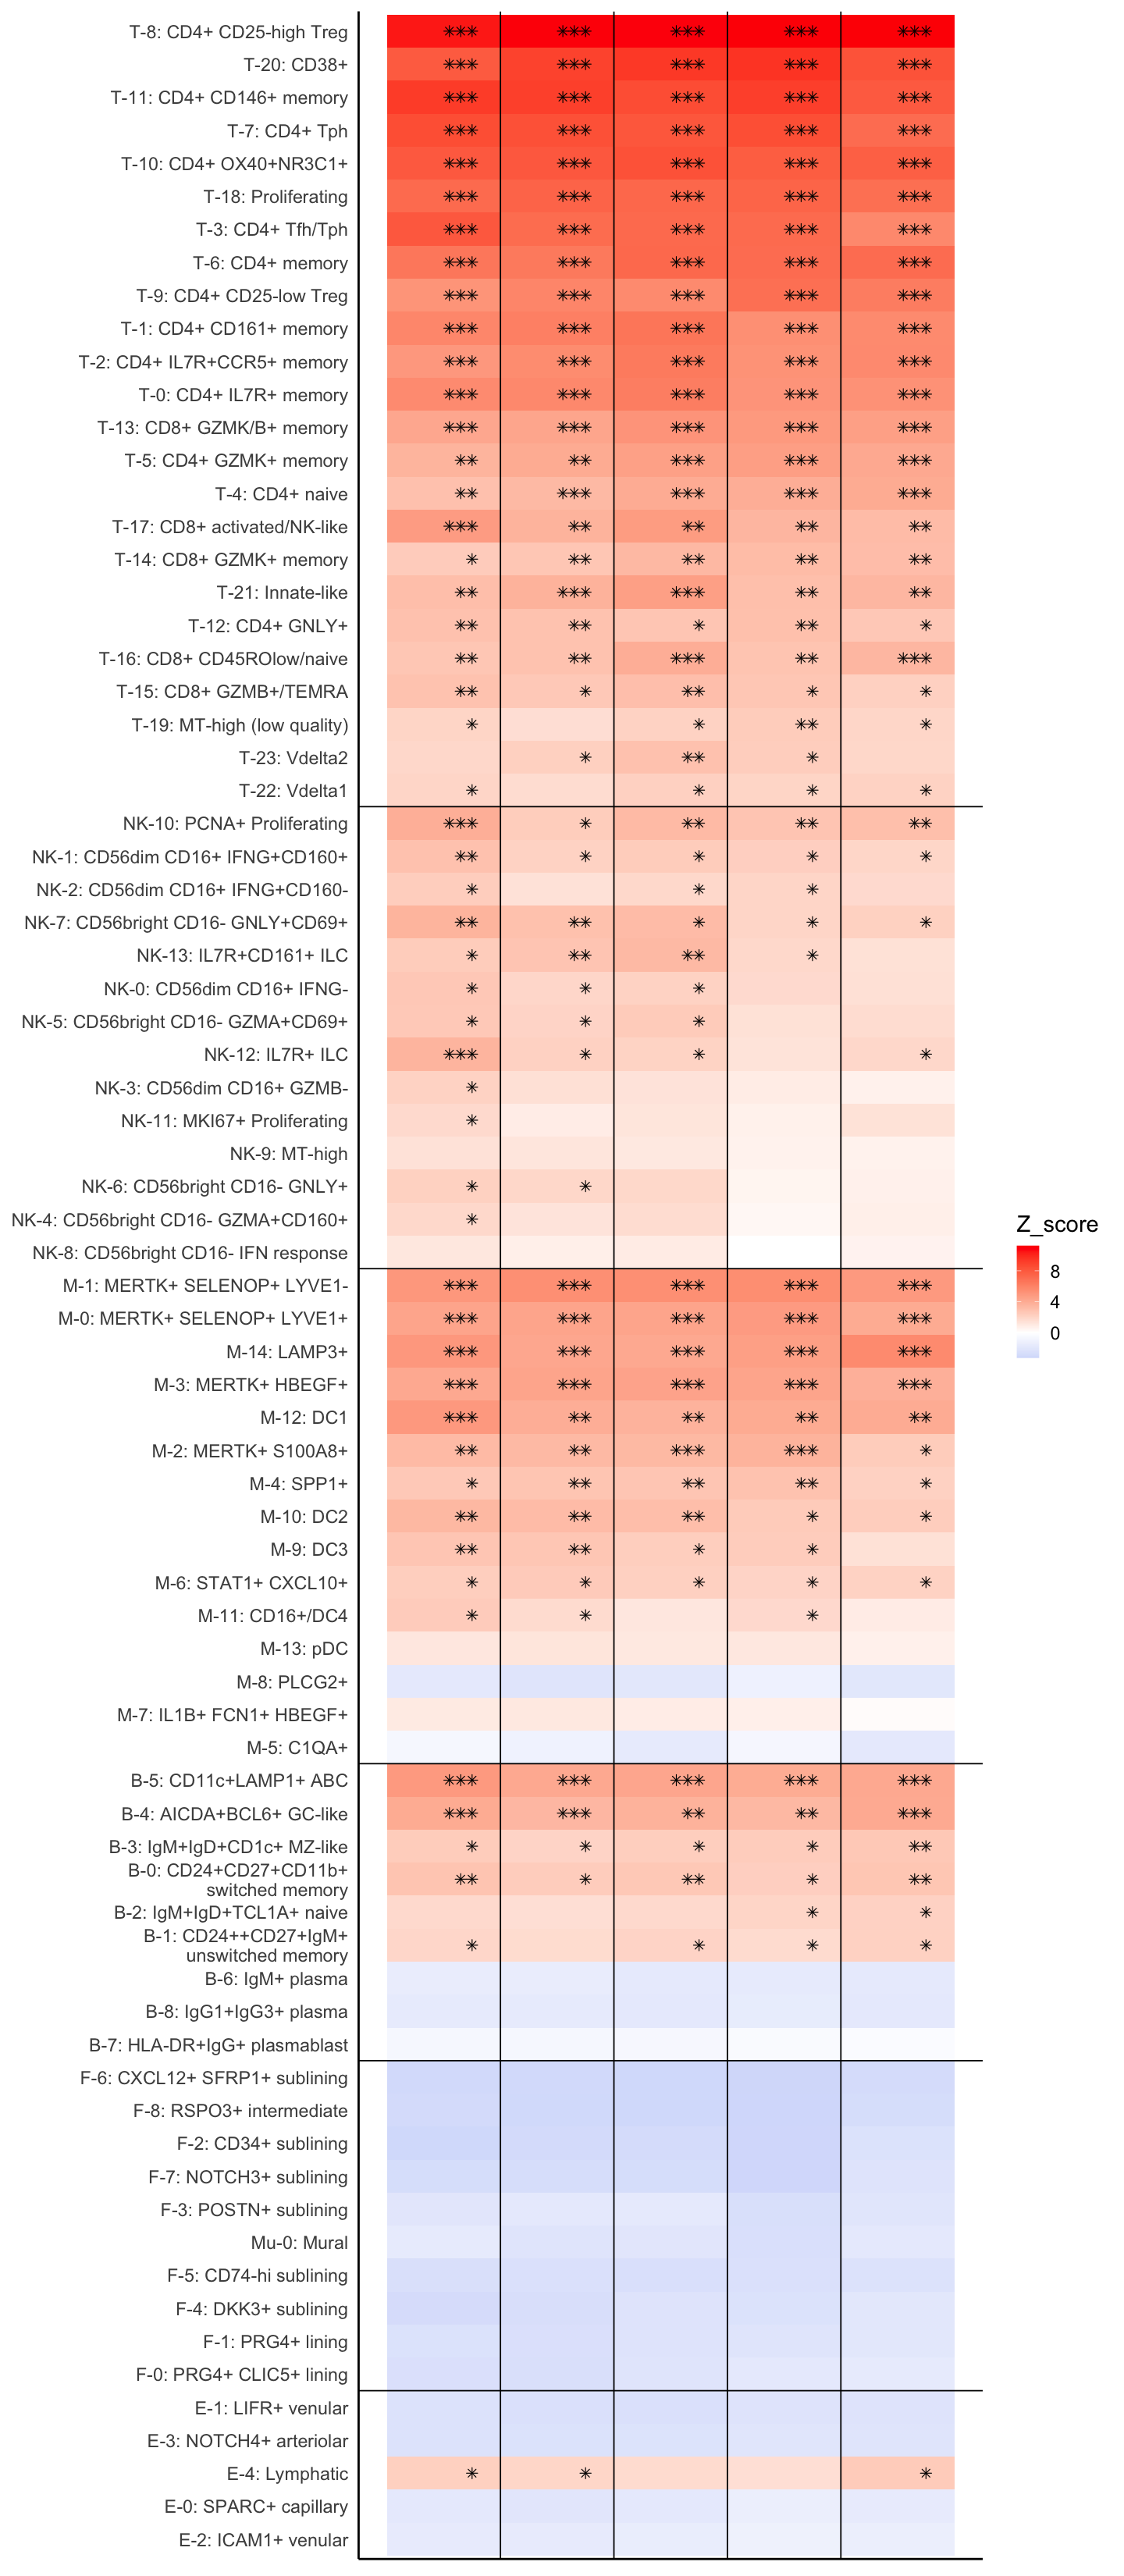

In [40]:
# assoc_mcz, prop_sig

data <- micro_5035
options(repr.plot.height = nrow(data)/2.8, repr.plot.width =12 )
#options(repr.plot.height = nrow(data)/2.8, repr.plot.width =7.2 )
p1 <-
# 0kb
ggplot(micro_0) + 
geom_tile(aes(x=0.5, y=factor(group, levels=ranked_cell_clusters), fill=assoc_mcz)) + 
scale_fill_gradient2(low="cornflowerblue", mid="white", high="red", midpoint=0) + 
geom_point(data = micro_0[micro_0$assoc_mcp < 0.05,], aes(x=0.75, y=factor(group, levels=names(meta_colors))), size=2.5, color='black', shape=8) + 
geom_point(data = micro_0[micro_0$assoc_mcp < 0.01,], aes(x=0.65, y=factor(group, levels=names(meta_colors))), size=2.5, color='black', shape=8) + 
geom_point(data = micro_0[micro_0$assoc_mcp < 0.001,], aes(x=0.55, y=factor(group, levels=names(meta_colors))), size=2.5, color='black', shape=8) + 
#geom_point(data = data[data$hetero_mcp < 0.05,], aes(x=0.75, y=factor(group, levels=names(meta_colors)), size = hetero_mcz), color='black') + 
# geom_text(data=data[data$rank_assoc_mcz<21,], aes(x=0.3, y=reorder(group, assoc_mcz), 
#                                           label = rank_assoc_mcz)) +

# 5kb
geom_tile(data=micro_5, aes(x=1.5, y=factor(group, levels=ranked_cell_clusters), fill=assoc_mcz)) + 
geom_point(data = micro_5[micro_5$assoc_mcp < 0.05,], aes(x=1.75, y=factor(group, levels=names(meta_colors))), size=2.5, color='black', shape=8) + 
geom_point(data = micro_5[micro_5$assoc_mcp < 0.01,], aes(x=1.65, y=factor(group, levels=names(meta_colors))), size=2.5, color='black', shape=8) + 
geom_point(data = micro_5[micro_5$assoc_mcp < 0.001,], aes(x=1.55, y=factor(group, levels=names(meta_colors))), size=2.5, color='black', shape=8) + 
# 10kb
geom_tile(data=micro_10, aes(x=2.5, y=factor(group, levels=ranked_cell_clusters), fill=assoc_mcz)) + 
geom_point(data = micro_10[micro_10$assoc_mcp < 0.05,], aes(x=2.75, y=factor(group, levels=names(meta_colors))), size=2.5, color='black', shape=8) + 
geom_point(data = micro_10[micro_10$assoc_mcp < 0.01,], aes(x=2.65, y=factor(group, levels=names(meta_colors))), size=2.5, color='black', shape=8) + 
geom_point(data = micro_10[micro_10$assoc_mcp < 0.001,], aes(x=2.55, y=factor(group, levels=names(meta_colors))), size=2.5, color='black', shape=8) + 

#5035
geom_tile(data=micro_5035, aes(x=3.5, y=factor(group, levels=ranked_cell_clusters), fill=assoc_mcz)) + 
geom_point(data = micro_5035[micro_5035$assoc_mcp < 0.05,], aes(x=3.75, y=factor(group, levels=names(meta_colors))), size=2.5, color='black', shape=8) + 
geom_point(data = micro_5035[micro_5035$assoc_mcp < 0.01,], aes(x=3.65, y=factor(group, levels=names(meta_colors))), size=2.5, color='black', shape=8) + 
geom_point(data = micro_5035[micro_5035$assoc_mcp < 0.001,], aes(x=3.55, y=factor(group, levels=names(meta_colors))), size=2.5, color='black', shape=8) + 

# 100kb
geom_tile(data=micro_100, aes(x=4.5, y=factor(group, levels=ranked_cell_clusters), fill=assoc_mcz)) + 
geom_point(data = micro_100[micro_100$assoc_mcp < 0.05,], aes(x=4.75, y=factor(group, levels=names(meta_colors))), size=2.5, color='black', shape=8) + 
geom_point(data = micro_100[micro_100$assoc_mcp < 0.01,], aes(x=4.65, y=factor(group, levels=names(meta_colors))), size=2.5, color='black', shape=8) + 
geom_point(data = micro_100[micro_100$assoc_mcp < 0.001,], aes(x=4.55, y=factor(group, levels=names(meta_colors))), size=2.5, color='black', shape=8) + 
geom_vline(xintercept=1) + geom_vline(xintercept=2) + geom_vline(xintercept=3) + geom_vline(xintercept=4) +

theme_classic(base_size =17.5) + 
theme( 
      axis.text.x = element_blank(), legend.position="right", 
      axis.title.y = element_blank(), axis.ticks.y = element_blank(), 
     axis.ticks.x = element_blank(), axis.title.x = element_blank()) +

geom_hline(yintercept=5.5) + geom_hline(yintercept=15.5)+ geom_hline(yintercept=24.5)+ geom_hline(yintercept=39.5)+ geom_hline(yintercept=53.5) + 
labs(fill='Z_score') 
p1


In [41]:
pdf("../../output/Final_figures/Window_comparison_RA_12-20-23.pdf", width=12, height=nrow(data)/2.8)
print(p1)
dev.off()

pdf 
  2

In [79]:
micro_5035[1:2,]

group,n_cell,n_ctrl,assoc_mcp,assoc_mcz,hetero_mcp,hetero_mcz,n_fdr_0.05,n_fdr_0.1,n_fdr_0.2,prop_sig
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
B-0: CD24+CD27+CD11b+ switched memory,5606,1000,0.01998002,2.267116,0.001998002,4.987217,47,136,372,0.8383874
B-1: CD24++CD27+IgM+ unswitched memory,2958,1000,0.04995005,1.707947,0.002997003,3.731718,16,63,141,0.5409060


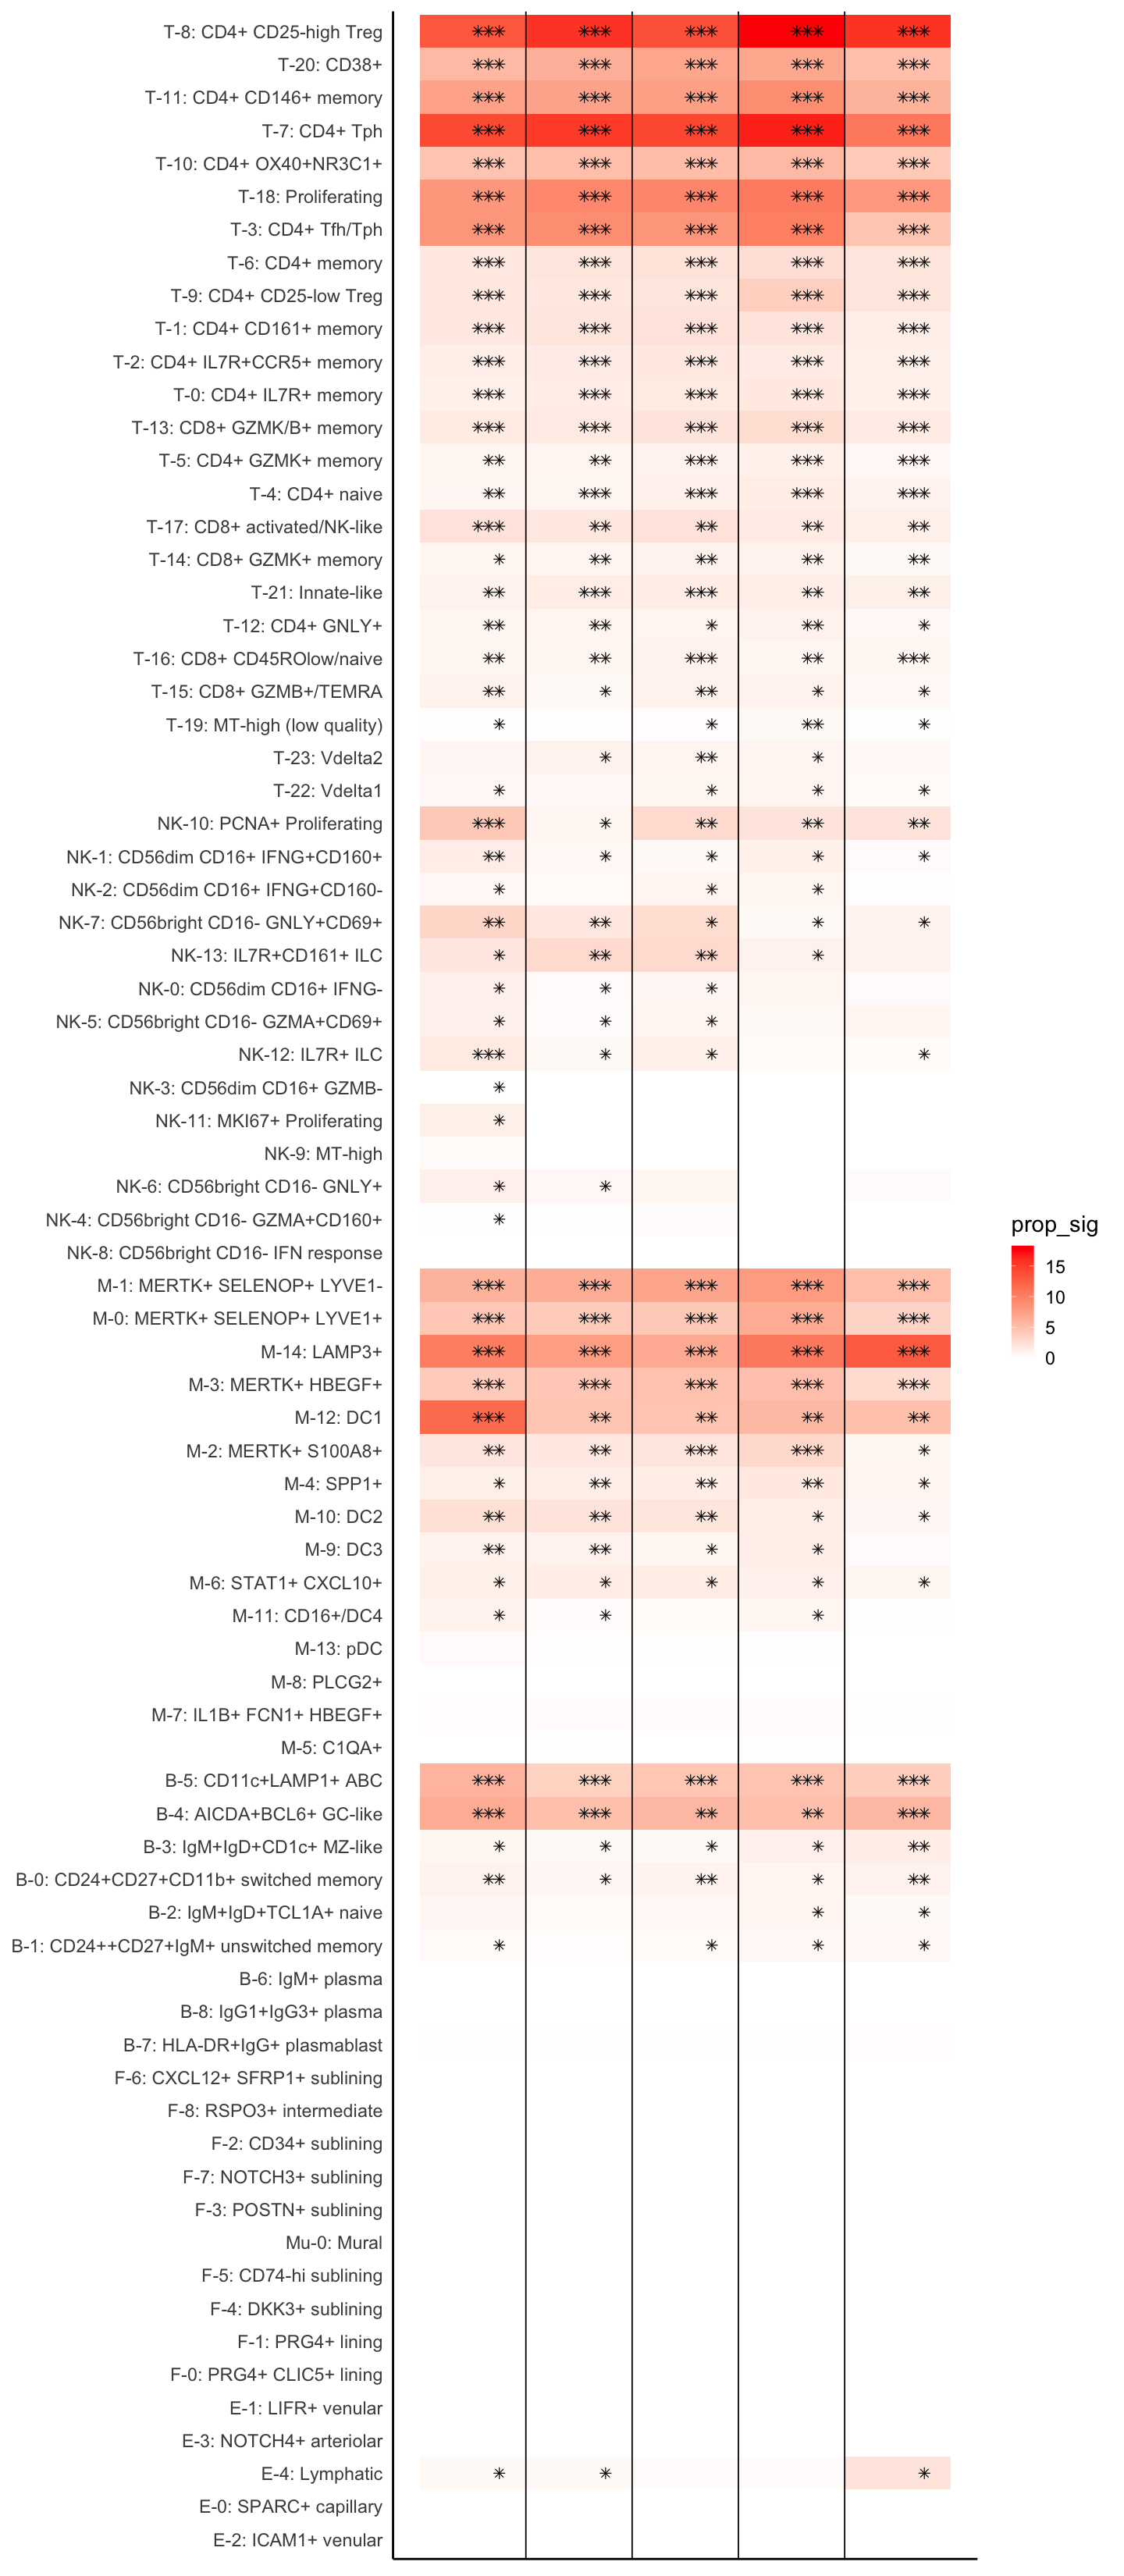

In [80]:
# assoc_mcz, prop_sig

data <- micro_5035
options(repr.plot.height = nrow(data)/2.8, repr.plot.width =12 )
#options(repr.plot.height = nrow(data)/2.8, repr.plot.width =7.2 )

# 0kb
ggplot(micro_0) + 
geom_tile(aes(x=0.5, y=factor(group, levels=ranked_cell_clusters), fill=prop_sig)) + 
scale_fill_gradient2(low="cornflowerblue", mid="white", high="red", midpoint=0) + 
geom_point(data = micro_0[micro_0$assoc_mcp < 0.05,], aes(x=0.75, y=factor(group, levels=names(meta_colors))), size=2.5, color='black', shape=8) + 
geom_point(data = micro_0[micro_0$assoc_mcp < 0.01,], aes(x=0.65, y=factor(group, levels=names(meta_colors))), size=2.5, color='black', shape=8) + 
geom_point(data = micro_0[micro_0$assoc_mcp < 0.001,], aes(x=0.55, y=factor(group, levels=names(meta_colors))), size=2.5, color='black', shape=8) + 
#geom_point(data = data[data$hetero_mcp < 0.05,], aes(x=0.75, y=factor(group, levels=names(meta_colors)), size = hetero_mcz), color='black') + 
# geom_text(data=data[data$rank_assoc_mcz<21,], aes(x=0.3, y=reorder(group, assoc_mcz), 
#                                           label = rank_assoc_mcz)) +

# 5kb
geom_tile(data=micro_5, aes(x=1.5, y=factor(group, levels=ranked_cell_clusters), fill=prop_sig)) + 
geom_point(data = micro_5[micro_5$assoc_mcp < 0.05,], aes(x=1.75, y=factor(group, levels=names(meta_colors))), size=2.5, color='black', shape=8) + 
geom_point(data = micro_5[micro_5$assoc_mcp < 0.01,], aes(x=1.65, y=factor(group, levels=names(meta_colors))), size=2.5, color='black', shape=8) + 
geom_point(data = micro_5[micro_5$assoc_mcp < 0.001,], aes(x=1.55, y=factor(group, levels=names(meta_colors))), size=2.5, color='black', shape=8) + 
# 10kb
geom_tile(data=micro_10, aes(x=2.5, y=factor(group, levels=ranked_cell_clusters), fill=prop_sig)) + 
geom_point(data = micro_10[micro_10$assoc_mcp < 0.05,], aes(x=2.75, y=factor(group, levels=names(meta_colors))), size=2.5, color='black', shape=8) + 
geom_point(data = micro_10[micro_10$assoc_mcp < 0.01,], aes(x=2.65, y=factor(group, levels=names(meta_colors))), size=2.5, color='black', shape=8) + 
geom_point(data = micro_10[micro_10$assoc_mcp < 0.001,], aes(x=2.55, y=factor(group, levels=names(meta_colors))), size=2.5, color='black', shape=8) + 

#5035
geom_tile(data=micro_5035, aes(x=3.5, y=factor(group, levels=ranked_cell_clusters), fill=prop_sig)) + 
geom_point(data = micro_5035[micro_5035$assoc_mcp < 0.05,], aes(x=3.75, y=factor(group, levels=names(meta_colors))), size=2.5, color='black', shape=8) + 
geom_point(data = micro_5035[micro_5035$assoc_mcp < 0.01,], aes(x=3.65, y=factor(group, levels=names(meta_colors))), size=2.5, color='black', shape=8) + 
geom_point(data = micro_5035[micro_5035$assoc_mcp < 0.001,], aes(x=3.55, y=factor(group, levels=names(meta_colors))), size=2.5, color='black', shape=8) + 

# 100kb
geom_tile(data=micro_100, aes(x=4.5, y=factor(group, levels=ranked_cell_clusters), fill=prop_sig)) + 
geom_point(data = micro_100[micro_100$assoc_mcp < 0.05,], aes(x=4.75, y=factor(group, levels=names(meta_colors))), size=2.5, color='black', shape=8) + 
geom_point(data = micro_100[micro_100$assoc_mcp < 0.01,], aes(x=4.65, y=factor(group, levels=names(meta_colors))), size=2.5, color='black', shape=8) + 
geom_point(data = micro_100[micro_100$assoc_mcp < 0.001,], aes(x=4.55, y=factor(group, levels=names(meta_colors))), size=2.5, color='black', shape=8) + 
geom_vline(xintercept=1) + geom_vline(xintercept=2) + geom_vline(xintercept=3) + geom_vline(xintercept=4) +

theme_classic(base_size =17.5) + 
theme( 
      axis.text.x = element_blank(), legend.position="right", 
      axis.title.y = element_blank(), axis.ticks.y = element_blank(), 
     axis.ticks.x = element_blank(), axis.title.x = element_blank())


